Read the GRIB file.

In [2]:
import pygrib

msgs = pygrib.open("6088a684fda21def1cebba2d9abacdbe.grib")
msgs

Look into it.

In [7]:
for msg in msgs[1:5]:
    print(msg)

1:2 metre temperature:K (instant):lambert:heightAboveGround:level 2 m:fcst time 0 hrs:from 202101010000
2:2 metre temperature:K (instant):lambert:heightAboveGround:level 2 m:fcst time 0 hrs:from 202101010600
3:2 metre temperature:K (instant):lambert:heightAboveGround:level 2 m:fcst time 0 hrs:from 202101011200
4:2 metre temperature:K (instant):lambert:heightAboveGround:level 2 m:fcst time 0 hrs:from 202101011800


In [28]:
msgs[1].keys()

['globalDomain',
 'GRIBEditionNumber',
 'tablesVersionLatestOfficial',
 'tablesVersionLatest',
 'grib2divider',
 'is_efas',
 'angleSubdivisions',
 'missingValue',
 'ieeeFloats',
 'isHindcast',
 'section0Length',
 'identifier',
 'discipline',
 'editionNumber',
 'totalLength',
 'sectionNumber',
 'section1Length',
 'numberOfSection',
 'centre',
 'centreDescription',
 'subCentre',
 'tablesVersion',
 'masterDir',
 'localTablesVersion',
 'significanceOfReferenceTime',
 'year',
 'month',
 'day',
 'hour',
 'minute',
 'second',
 'dataDate',
 'julianDay',
 'dataTime',
 'productionStatusOfProcessedData',
 'typeOfProcessedData',
 'md5Section1',
 'selectStepTemplateInterval',
 'selectStepTemplateInstant',
 'stepType',
 'is_chemical',
 'is_chemical_distfn',
 'is_chemical_srcsink',
 'is_aerosol',
 'is_aerosol_optical',
 'setCalendarId',
 'deleteCalendarId',
 'is_uerra',
 'sectionNumber',
 'grib2LocalSectionPresent',
 'deleteLocalDefinition',
 'section2Length',
 'numberOfSection',
 'addEmptySection2',

In [20]:
msgs[1].latlons()[0].shape 

(989, 789)

In [16]:
msgs[1].values.shape

(989, 789)

Hence, the data `msgs` consists of lots of `messages` (`msg`), and each `msg` contains a single time point of the two-meter temperatures of all the $989\times 739$ grid points. The temperatures are accessed by `msg.values`.

In [27]:
msgs[1].max, msgs[1].min, msgs[1].average

(280.10791015625, 233.64794921875, 269.9381298107956)

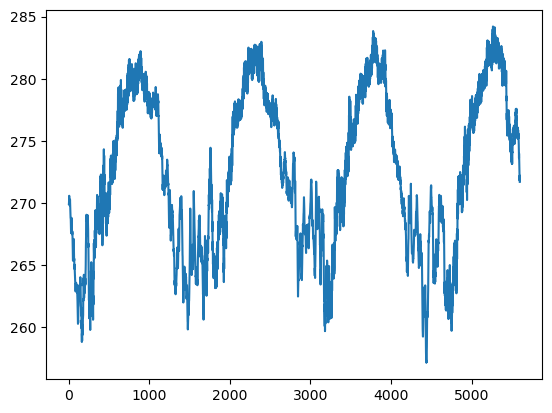

In [49]:
avg_temp_timeSeries = []
msgs.rewind() # remember to rewind the iterator before iterating again
for msg in msgs:
    avg_temp_timeSeries.append(msg.average)
    
import matplotlib.pyplot as plt
plt.plot(avg_temp_timeSeries)

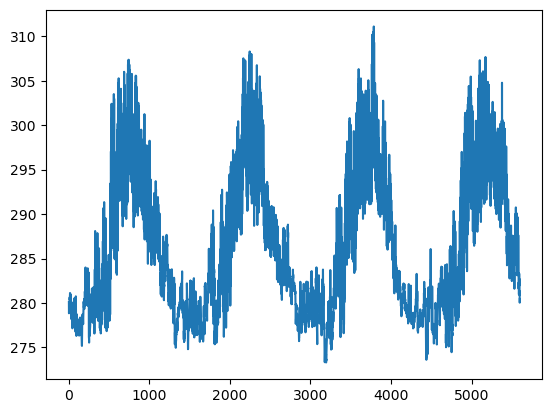

In [ ]:
max_temp_timeSeries = []
msgs.rewind()
for msg in msgs:
    max_temp_timeSeries.append(msg.max)
    
plt.plot(max_temp_timeSeries)

The temperatures over the entire Arctic region shows no **abnormal decrease**.

In [ ]:
for key in msgs[1].keys():
    print(msgs[1][key])

In [ ]:
msgs.close()